In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"aashitajain12","key":"1c9f809d38805a05f7ce3bda209435f8"}'}

In [ ]:
!pip install -q kaggle

In [ ]:
!mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
!cp kaggle.json ~/.kaggle

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d mathchi/diabetes-data-set

  0% 0.00/8.91k [00:00<?, ?B/s]
100% 8.91k/8.91k [00:00<00:00, 20.2MB/s]


In [ ]:
!unzip diabetes-data-set.zip -d dataset

Archive:  diabetes-data-set.zip
replace dataset/diabetes.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

In [ ]:
!rm diabetes-data-set.zip

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [ ]:
d1= pd.read_csv("/content/diabetes.csv")

In [ ]:
d1

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [ ]:
X= d1.drop(['Outcome'], axis=1)

In [ ]:
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [ ]:
Y= d1['Outcome']

In [ ]:
Y

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train,X_test,Y_train,Y_test= train_test_split(X,Y, random_state=42)

In [ ]:
X_train,X_valid,Y_train, Y_valid= train_test_split(X_train, Y_train)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.optimizers import Adam

In [ ]:
model= Sequential()
model.add(Dense(1000, input_dim=8, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1000, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(500, activation= 'relu'))
model.add(Dropout(0.2))
model.add(Dense(1, activation= 'sigmoid'))

In [ ]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_19 (Dense)            (None, 1000)              9000      
                                                                 
 dropout_12 (Dropout)        (None, 1000)              0         
                                                                 
 dense_20 (Dense)            (None, 1000)              1001000   
                                                                 
 dropout_13 (Dropout)        (None, 1000)              0         
                                                                 
 dense_21 (Dense)            (None, 500)               500500    
                                                                 
 dropout_14 (Dropout)        (None, 500)               0         
                                                                 
 dense_22 (Dense)            (None, 1)                

In [ ]:
model.compile(loss= 'binary_crossentropy', optimizer= Adam(0.01), metrics= ['accuracy'])

In [ ]:
hist= model.fit(X_train, Y_train, batch_size=32, epochs=50, validation_data= (X_valid, Y_valid))

Epoch 1/50
11/11 [==============================] - 2s 30ms/step - loss: 52.3673 - accuracy: 0.6019 - val_loss: 0.7150 - val_accuracy: 0.7222
Epoch 2/50
11/11 [==============================] - 0s 8ms/step - loss: 0.7653 - accuracy: 0.6049 - val_loss: 0.5998 - val_accuracy: 0.7222
Epoch 3/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6922 - accuracy: 0.6389 - val_loss: 0.6603 - val_accuracy: 0.7130
Epoch 4/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6833 - accuracy: 0.6481 - val_loss: 0.6086 - val_accuracy: 0.7130
Epoch 5/50
11/11 [==============================] - 0s 7ms/step - loss: 0.6563 - accuracy: 0.6759 - val_loss: 0.6595 - val_accuracy: 0.6944
Epoch 6/50
11/11 [==============================] - 0s 6ms/step - loss: 0.6503 - accuracy: 0.6605 - val_loss: 0.6852 - val_accuracy: 0.6667
Epoch 7/50
11/11 [==============================] - 0s 8ms/step - loss: 0.6348 - accuracy: 0.6790 - val_loss: 0.7676 - val_accuracy: 0.6389
Epoch 8/50
11/11 [

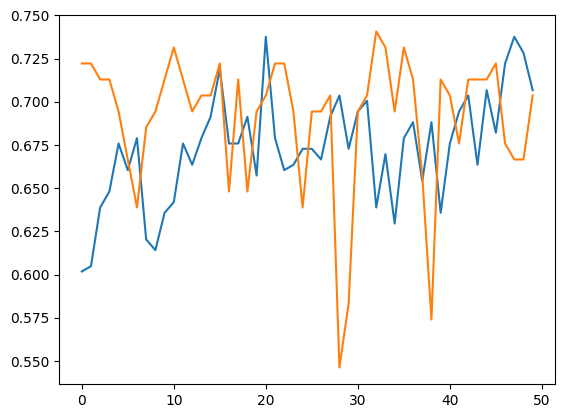

In [ ]:
plt.plot(hist.history['accuracy'], label='Accuracy')
plt.plot(hist.history['val_accuracy'], label='Val_accuracy')

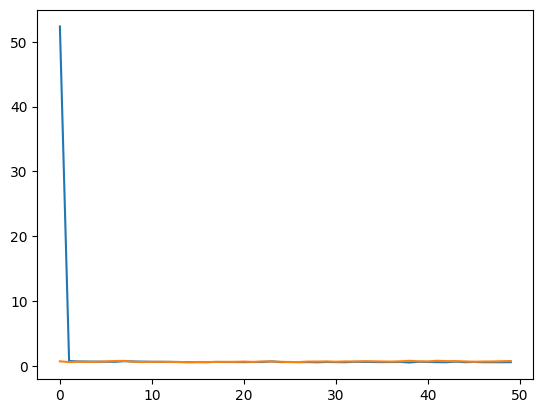

In [ ]:
plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='Val_loss')

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
Y_Pred= np.argmax(model.predict(X_test), axis=1)

6/6 [==============================] - 0s 3ms/step


In [ ]:
Y_Pred

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [ ]:
classification_report(Y_test, Y_Pred)

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


'              precision    recall  f1-score   support\n\n           0       0.64      1.00      0.78       123\n           1       0.00      0.00      0.00        69\n\n    accuracy                           0.64       192\n   macro avg       0.32      0.50      0.39       192\nweighted avg       0.41      0.64      0.50       192\n'